In [1]:
import urllib
import gzip
from io import BytesIO

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from gtfparse import read_gtf
import pyBigWig

import raesymatto.visualizations

%matplotlib inline
%load_ext autoreload
%autoreload 2

mpl.rcParams.update({'axes.linewidth': 0.25,
                     'xtick.major.size': 2,
                     'xtick.major.width': 0.25,
                     'ytick.major.size': 2,
                     'ytick.major.width': 0.25,
                     'pdf.fonttype': 42,
                     'font.size': 7,
                     'font.sans-serif': 'Arial'})

%config InlineBackend.figure_format = 'retina'

### Read data

In [2]:
# conservation (bigWig)
cons_bw = pyBigWig.open('https://hgdownload.soe.ucsc.edu/goldenPath/mm10/phyloP60way/mm10.60way.phyloP60way.bw')

# ATAC-seq (bigWig)
wt_imm_bw = pyBigWig.open('https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4486nnn/GSM4486874/suppl/GSM4486874%5FWT%5FImCD4%5FATAC%5FCPM%5FRep1%2Ebw')
thpok_ko_bw = pyBigWig.open('https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4486nnn/GSM4486877/suppl/GSM4486877%5FKO%5FImCD4%5FATAC%5FCPM%5FRep1%2Ebw')

# GATA3 motifs (BED)
gata3_bed = pd.read_csv('http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/mm10/MA0037.4.tsv.gz',sep='\t',compression='gzip',header=None)

# GATA3 binding sites (BED)
gata3_bs_bed = pd.read_csv('https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2931nnn/GSM2931810/suppl/GSM2931810%5FTh2%5FGATA3%5Fpeaks%2E0%2EFNG%2Egenes%2Etxt%2Egz',
                           compression='gzip',sep='\t',comment='#',header=None,usecols=(0,1,2,3,7),names=(0,1,2,3,4))

# Gene definitions (GTF)
with urllib.request.urlopen('https://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/genes/mm10.refGene.gtf.gz') as f:
    genes_gtf = read_gtf(BytesIO(gzip.decompress(f.read())))

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'exon_number', 'exon_id']


### Define the region of interest

In [3]:
chromosome,start,end = 'chr3',89373714,89397292

### Plot

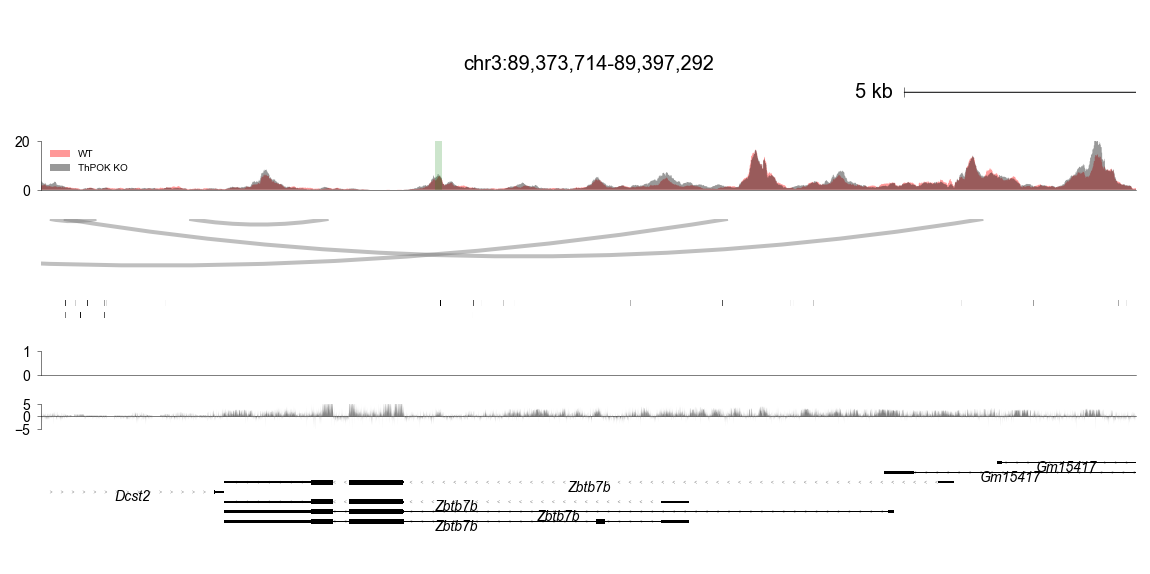

In [4]:
fig = plt.figure()
fig.set_size_inches((8,4))
gs = gridspec.GridSpec(7,1,height_ratios=(1,0.5,0.5,0.25,0.25,0.25,1))

# visualize region information and scale bar
ax = fig.add_subplot(gs[0,0])
raesymatto.visualizations.draw_region_information(ax,chromosome,start,end,fontsize=10)

# visualize two bigwig files
ax = fig.add_subplot(gs[1,0])
raesymatto.visualizations.draw_bw(ax,chromosome,start,end,wt_imm_bw,ymin=0,ymax=20,
                                  label='WT',kwargs={'lw':0,'fc':'red','alpha':0.4})
raesymatto.visualizations.draw_bw(ax,chromosome,start,end,thpok_ko_bw,ymin=0,ymax=20,
                                  label='ThPOK KO',kwargs={'lw':0,'fc':'black','alpha':0.4})

# add a legend
ax.legend(loc='upper left',frameon=False,fontsize=5)

# add a shaded rectangle to show a region of interest
ax.add_patch(mpl.patches.Rectangle((89382182,0),89382343-89382182,20,
                                          color='green',alpha=0.2,lw=0))

# visualize some artificial looping data
ax = fig.add_subplot(gs[2,0])
# create some example looping data
loops_bed = pd.DataFrame([['chr3',89363900,89388500],
                          ['chr3',89373900,89374900],
                          ['chr3',89376900,89379900],
                          ['chr3',89374200,89394000]])
raesymatto.visualizations.draw_loops(ax,chromosome,start,end,loops_bed,frame=False,flip=True,
                                     kwargs={'lw':2,'ec':'gray','fc':'none','alpha':0.5})

# visualize some "flat" BED rectangles (score defines the color)
ax = fig.add_subplot(gs[3,0])
raesymatto.visualizations.draw_bed(ax,chromosome,start,end,gata3_bed,frame=False,
                                   scores=True,kwargs={'lw':0})

# visualize some BED rectangles (score defines the height)
ax = fig.add_subplot(gs[4,0])
raesymatto.visualizations.draw_boxes(ax,chromosome,start,end,gata3_bs_bed,
                                     kwargs={'lw':0,'fc':'gray'})

# visualize conservation data
ax = fig.add_subplot(gs[5,0])
raesymatto.visualizations.draw_bw(ax,chromosome,start,end,cons_bw,ymin=-5,ymax=5,
                                  xspine=0,kwargs={'lw':0,'fc':'gray'})

# visualize gene models
ax = fig.add_subplot(gs[6,0])
raesymatto.visualizations.draw_gene_models(ax,chromosome,start,end,genes_gtf,min_height=10,
                                           fontsize=7,frame=False)

fig.set_tight_layout(True)
# fig.savefig('output.pdf')